In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import pickle
import numpy as np

In [3]:
from dcpyps import mechanism
from dcpyps.samples import samples

In [4]:
def constrain(mec):
    for i in range(len(mec.Rates)):
        mec.Rates[i].fixed = False
    # Constrained rates.
    mec.Rates[21].is_constrained = True
    mec.Rates[21].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[21].constrain_args = [20, 1.5]
    mec.Rates[18].is_constrained = True
    mec.Rates[18].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[18].constrain_args = [19, 2]
    mec.Rates[14].is_constrained = True
    mec.Rates[14].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[14].constrain_args = [12, 3]
    mec.Rates[13].is_constrained = True
    mec.Rates[13].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[13].constrain_args = [12, 2]
    mec.Rates[15].is_constrained = True
    mec.Rates[15].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[15].constrain_args = [17, 3]
    mec.Rates[16].is_constrained = True
    mec.Rates[16].constrain_func = mechanism.constrain_rate_multiple
    mec.Rates[16].constrain_args = [17, 2]
    mec.update_constrains()
    mec.set_mr(True, 9, 0)
    mec.set_mr(True, 11, 1)
    mec.update_constrains()
    return mec

In [5]:
mec_true = samples.GlyR_flip()
ig = [4200, 28000, 130000, 3400, 2100, 6700, 180, 6800, 22000,
    29266, 18000, 948, 302, 604, 906, 1.77e6, 1.18e6, 0.59e6, 300e6, 150e6,
    2500, 3750]
mec_true.set_rateconstants(ig)
mec_true = constrain(mec_true)
mec = samples.GlyR_flip()
mec = constrain(mec)

In [7]:
os.chdir("mpi/results")

In [44]:
r = []
x = []
lik = []
cputime = []
for file in glob.glob("*.result"):
    with open(file, 'rb') as f:
        content = pickle.load(f)
    #print (np.exp(content[0].x))
    mec.theta_unsqueeze(np.exp(content[0].x))
    mec.update_constrains()
    x.append(np.exp(content[0].x))
    r.append(mec.unit_rates())
    lik.append(-content[0].fun)
    cputime.append(content[1])
rates = np.array(r)

In [45]:
print('Fits of {0:d} simulated sets'.format(len(lik)))
print('Rate\tTrue\t\tMean\t\tCV%\t\tBias%')
print('=================================================================================')
for i in range(len(mec.unit_rates())):
    print(mec.Rates[i].name + '\t' + str(mec_true.Rates[i].unit_rate()) + '\t\t' +
         str(np.mean(rates[:, i])) + '\t' + str(100 * np.std(rates[:, i]) / np.mean(rates[:, i])) +
         '\t' + str(100 * (np.mean(rates[:, i]) / mec_true.Rates[i].unit_rate() - 1)))

Fits of 88 simulated sets
Rate	True		Mean		CV%		Bias%
beta1	4200		4591.10600559	8.32650267866	9.31204775222
beta2	28000		30583.5296058	6.83308947138	9.22689144936
beta3	130000		133891.713309	1.37312028963	2.99362562265
alpha1	3400		3213.63110812	4.24299081431	-5.48143799641
alpha2	2100		2021.55370534	3.44638421656	-3.73553784086
alpha3	6700		5825.87121966	5.37473712298	-13.046698214
delta1	180		183.762934329	10.4129292828	2.09051907171
delta2	6800		6838.06026063	2.36181509173	0.559709715186
delta3	22000		24319.8306565	7.55198198123	10.5446848022
gamma1	29266.6001994		31796.659305	9.44585099872	8.64486851352
gamma2	18000		19744.1416742	3.33331077124	9.6896759678
gamma3	948.091156993		1173.93912961	11.211348648	23.8213352117
k(-1)	302		304.38998807	4.46290206176	0.791386778183
2k(-2)	604		608.77997614	4.46290206176	0.791386778183
3k(-3)	906		913.16996421	4.46290206176	0.791386778183
3k(+1)	1770000.0		1761709.33063	4.5154544727	-0.468399399215
2k(+2)	1180000.0		1174472.88709	4.5154544727	

Red line - true value


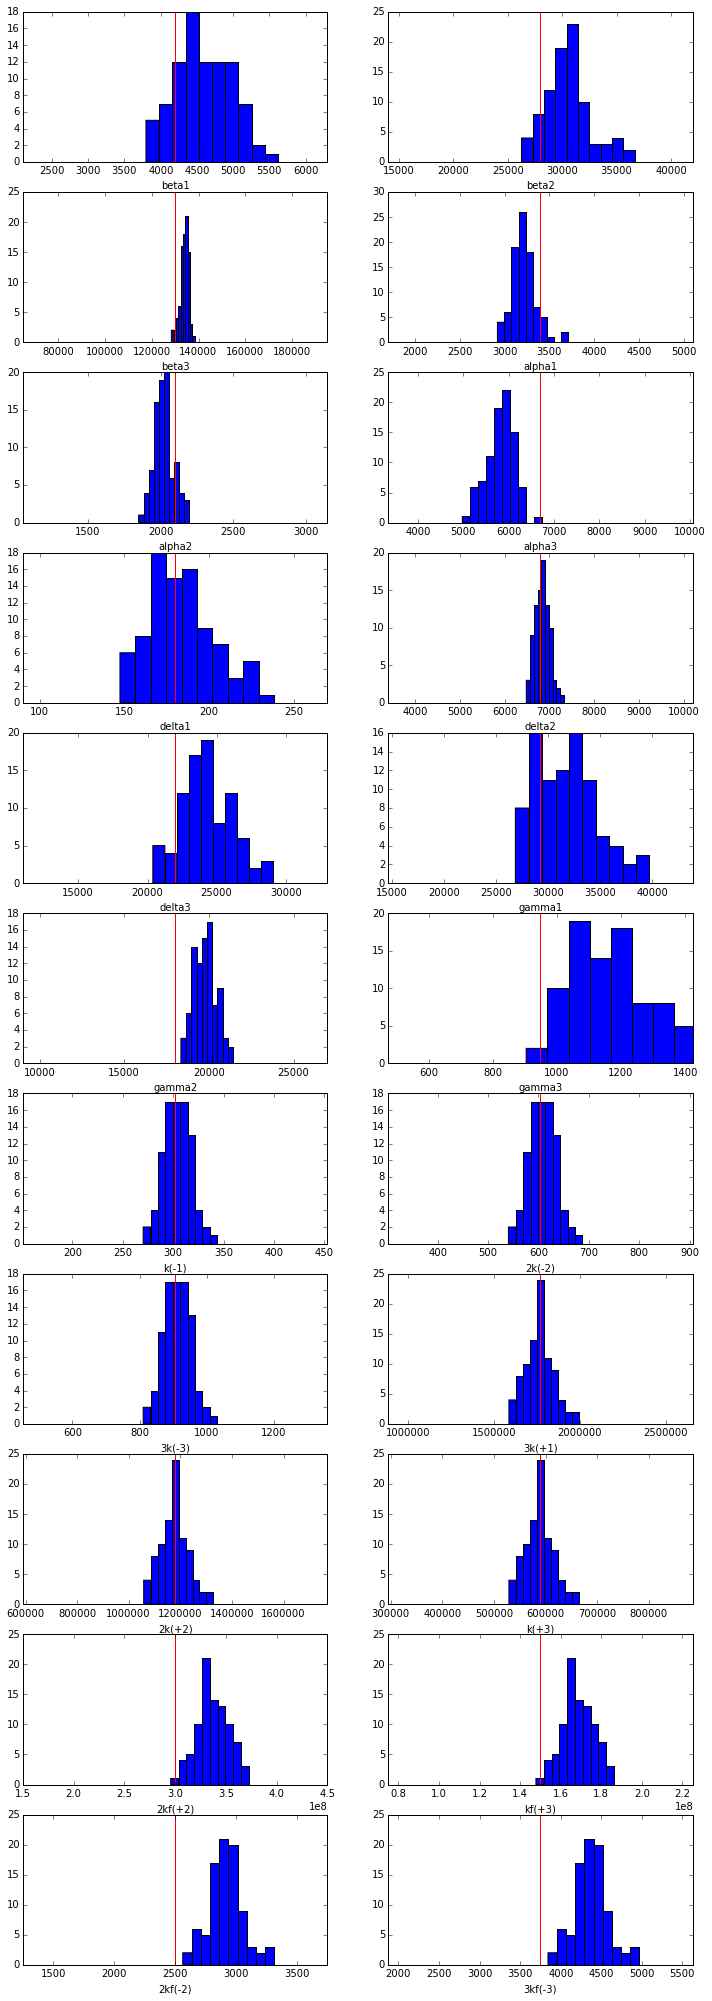

In [46]:
fig = plt.figure(figsize=(12,35))
rows = int(len(mec.unit_rates()) / 2)
for i in range(rows):
    ax1 = fig.add_subplot(rows, 2, 2*i+1)
    ax1.hist(rates[:, 2*i])
    ax1.axvline(mec_true.Rates[2*i].unit_rate(), color='r')
    ax1.set_xlabel(mec.Rates[2*i].name)
    ax1.set_xlim([mec_true.Rates[2*i].unit_rate() * 0.5, 1.5 * mec_true.Rates[2*i].unit_rate()])
    ax2 = fig.add_subplot(rows, 2, 2*i+2)
    ax2.hist(rates[:, 2*i+1])
    ax2.axvline(mec_true.Rates[2*i+1].unit_rate(), color='r')
    ax2.set_xlabel(mec.Rates[2*i+1].name)
    ax2.set_xlim([mec_true.Rates[2*i+1].unit_rate() * 0.5, 1.5 * mec_true.Rates[2*i+1].unit_rate()])
print('Red line - true value')

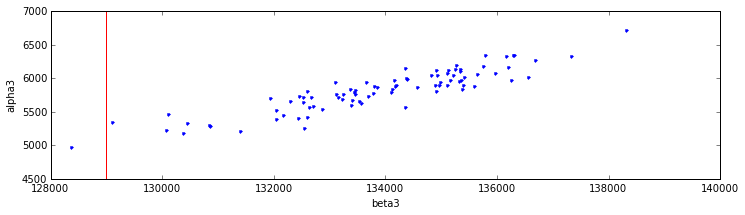

In [47]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(rates[:, 2], rates[:, 5], 'b.')
ax.axvline(129000.0, color='r')
ax.axhline(7000.0, color='r')
ax.set_xlabel('beta3')
ax.set_ylabel('alpha3')

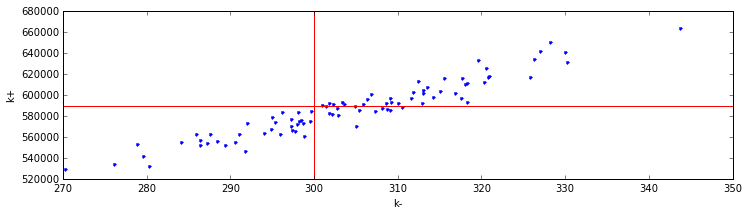

In [48]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(rates[:, 12], rates[:, 17], 'b.')
ax.axvline(300, color='r')
ax.axhline(0.59e6, color='r')
ax.set_xlabel('k-')
ax.set_ylabel('k+')

Mean CPU time =  41.7632945998


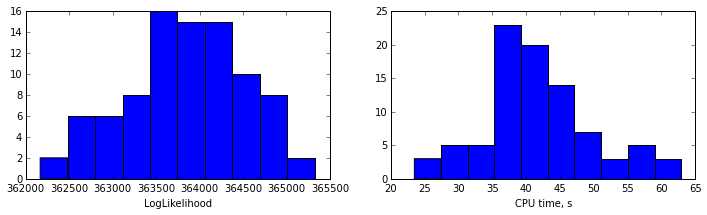

In [49]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
ax.hist(lik)
ax.set_xlabel('LogLikelihood')
ax = fig.add_subplot(122)
ax.hist(cputime)
ax.set_xlabel('CPU time, s')
print('Mean CPU time = ', np.mean(cputime))